**Hello World Example**

_This notebook is partly based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "CNN_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# Import the Keras API from Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from https://www.openml.org

In [4]:
import math
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1,cache=True,return_X_y=True)
X = X.values

# Use the notion of y=f(X)
y = y.values.astype(int)
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


# Test and Training Data
Let's split into training images and test images.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7, stratify=y, random_state=42)

# shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
# X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]

# reshape into images
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for training'.format(X_test.shape[0]))

Matrix shape X:  (60000, 28, 28, 1)
60000 samples for training
10000 samples for training


Plot an image as sanity check.

Number:  7


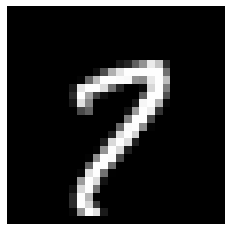

In [11]:
plot_image(X_train[15000,:,:,0])
print('Number: ', y_train[15000])


# LeNet-5
Build a LeNet-5 model in Keras. For LeNet-5 the simple sequential model is sufficient (it is only a sequence of layers without branching). LeNet starts actually with a $32 \times 32 $ input while in sklearn, we have $28 \times 28$. We are also going to use Relu instead of the sigmoid activation function. 

In [12]:
X_train.max()

255.0

In [18]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


# model.add(Dense(1, activation='LEAKYRELU'))




sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [14]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

Turn the numbers into one-hot vectors

In [15]:
nClasses = 10
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)


See if it worked

In [16]:
for i in range(0,200,20):
    print(y_train[i], " ", y_train_k[i,:])


6   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
3   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
9   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
6   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MNIST Training

In [19]:
batchSize = 128
nEpochs = 16

history = model.fit(X_train/255, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                    validation_data=(X_test/255, y_test_k))


Epoch 1/16
469/469 [==============================] - 11s 5ms/step - loss: 2.3212 - accuracy: 0.1368 - val_loss: 2.3003 - val_accuracy: 0.1413
Epoch 2/16
469/469 [==============================] - 2s 5ms/step - loss: 2.2860 - accuracy: 0.1548 - val_loss: 2.2711 - val_accuracy: 0.1713
Epoch 3/16
469/469 [==============================] - 2s 4ms/step - loss: 2.2570 - accuracy: 0.2165 - val_loss: 2.2394 - val_accuracy: 0.2668
Epoch 4/16
469/469 [==============================] - 2s 4ms/step - loss: 2.2184 - accuracy: 0.3251 - val_loss: 2.1909 - val_accuracy: 0.3763
Epoch 5/16
469/469 [==============================] - 2s 4ms/step - loss: 2.1553 - accuracy: 0.4290 - val_loss: 2.1083 - val_accuracy: 0.4713
Epoch 6/16
469/469 [==============================] - 2s 4ms/step - loss: 2.0419 - accuracy: 0.5057 - val_loss: 1.9547 - val_accuracy: 0.5436
Epoch 7/16
469/469 [==============================] - 2s 5ms/step - loss: 1.8327 - accuracy: 0.5731 - val_loss: 1.6797 - val_accuracy: 0.6113
Epoch

In [ ]:
y_predict = model.predict(X_test.astype(float))
print(y_predict[0])

[2.0811441e-30 4.0260577e-08 4.9294357e-11 3.3902772e-10 5.4463163e-21
 6.0540521e-30 1.9132206e-16 1.0000000e+00 1.9617619e-12 6.6004430e-18]


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, np.argmax(y_predict,axis=1))
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[   0   18  155  346    6    0    0  158  302    1]
 [   0 1089    8    8    5    0    0    5    9    1]
 [   0   16  826   34   41    0    0   40   42    0]
 [   0   12   53  857    4    0    0   38   56    0]
 [   0    6   10   15  917    0    0   14   12    1]
 [   0   27   13  339   44    0    0   27  451    1]
 [   0    3  500   54  210    0    0    4  208    3]
 [   0   19   16   23   24    0    0  947   13    0]
 [   0   28    8   60   12    0    0   13  854    0]
 [   0   21   17  151  360    0    0  350   95    0]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure LeNet5_confusion_matrix_errors


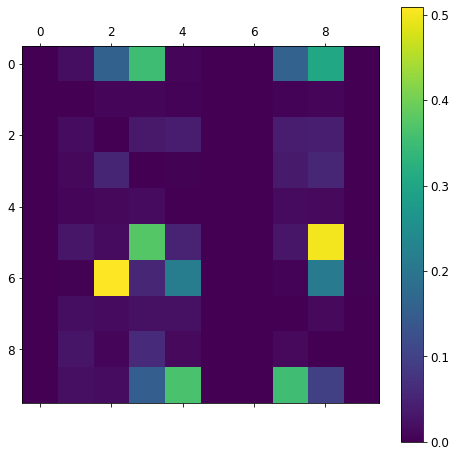

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("LeNet5_confusion_matrix_errors", tight_layout=False)
plt.show()

# Training History Visualization 

**Accuracy**
Source: Keras manual

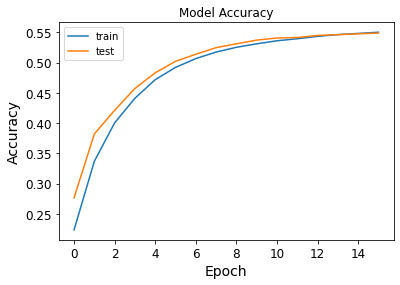

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    



**Loss**
Source: Keras manual

In [ ]:
history.history.keys()
'val_' + k

'val_accuracy'

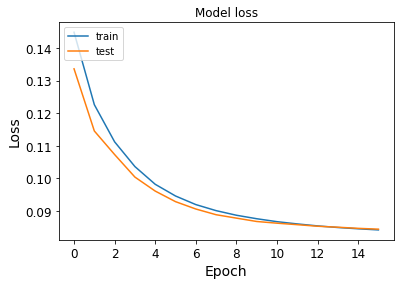

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

